In [ ]:
#12
import numpy as np
#traintestsplit
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
#onehotにする
def text_to_numeric(labels):
    unique_labels=sorted(set(labels))
    label_to_num={label:idx for idx,label in enumerate(unique_labels)}
    numeric_labels=[label_to_num[label] for label in labels]
    return numeric_labels
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]
#MSE
def mean_squared_error(y_true, y_pred):
    error = y_true - y_pred
    squared_error = np.square(error)
    mse = np.mean(squared_error)
    return mse

#softmax関数
def softmax(scores):
    exps = np.exp(scores)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums
#勾配降下ベクトル
def make_gradient(X_train,Y_train_one_hot,theta,m):
    logits = X_train @ theta
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradient = 1 / m * X_train.T @ error
    return gradient
#スケーリング
def standard_data(data):
    data_mean=np.mean(data,axis=0)
    data_std=np.std(data,axis=0)
    standardized_data=(data-data_mean)/data_std
    return standardized_data

In [ ]:
#パラメータ初期化
eta=0.1
n_iterations=100
minimum_error=float("inf")
#データインポート

#データ作成
train_data,test_data=split_train_test(data,0.2)
X_train=train_data.drop("target",axis=1)
Y_train=train_data[target]

features=X_train.shape[1]
m=X_train.shape[0]
theta=np.random.randn(features+1,1)

X_train_std=standard_data(X_train)
X_train_std_b=np.c_[np.ones((m,1),X_train_std)]

Y_train_numeric=text_to_numeric(Y_train)
Y_train_onehot=to_one_hot(Y_train_numeric)

In [ ]:
#step繰り返し
for iteration in range (n_iterations):
    gradients=make_gradient(X_train_std_b,Y_train_onehot,theta,m)
    theta=theta-eta*gradients
    Y_pred=np.dot(X_train_std_b,theta)
    #if早期打ち切り
    error=mean_squared_error(Y_train_onehot,Y_pred)
    if error<minimum_error:
        minimum_error=error
        best_theta=theta
        final_ite=iteration
    #最小値表示
    print("minimun_error:"mininum_error,
            "final_ite:"final_ite)

In [8]:
#8
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier

iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=iris["target"]
C = 5
alpha = 0.05
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
def make_line(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = make_line(lin_clf)
svc_line = make_line(svc_clf)
sgd_line = make_line(sgd_clf)

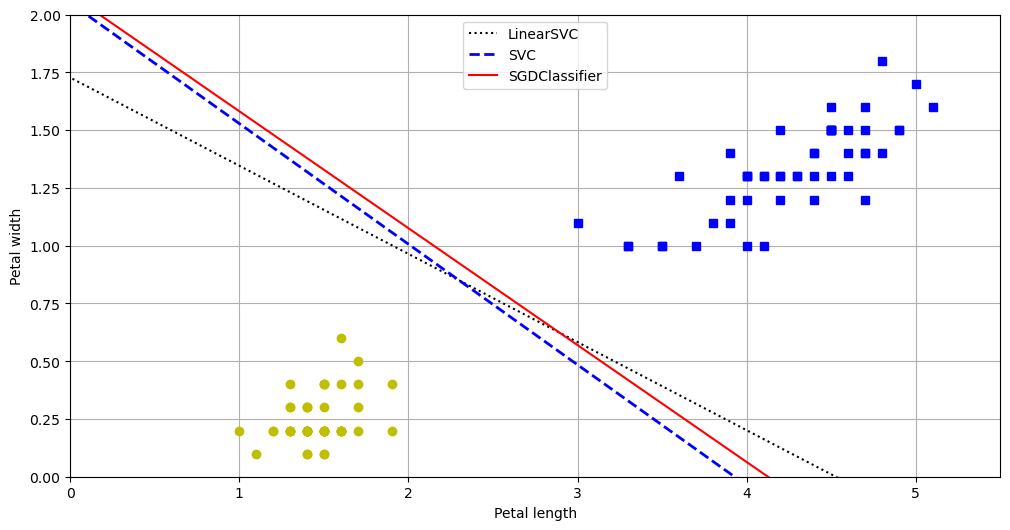

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") 
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") 
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.legend(loc="upper center")
plt.show()

In [17]:
#9
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",parser='auto',version=1)
X,y=mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [18]:
from sklearn.model_selection import train_test_split
X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.125,random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
param_grid=[{"C":[1,10,100],"gamma":[0.01,0.1,1]}]
svc_clf=SVC()
grid_search=GridSearchCV(svc_clf,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_val,y_val)
ovr_clf=OneVsRestClassifier(grid_search.best_estimator_)
ovr_clf.fit(X_train,y_train)
ovr_predict=ovr_clf.predict(X_val)
print(accuracy(ovr_predict,y_val))

In [ ]:
#10
import os
import tarfile
import urllib
from pathlib import Path
import pandas as pd
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [ ]:
from sklearn.model_selection import train_test_split
housing_train,housing_test=train_test_split(housing,test_size=0.2,random_state=42)
housing_train_data=housing_train.drop("median_house_value",axis=1)
housing_train_label=housing_train["median_house_value"]
housing_test_data=housing_train.drop("median_house_value",axis=1)
housing_test_label=housing_train["median_house_value"]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),("attribs_adder",CombinedAttributesAdder()),("std_scaler",StandardScaler()),])
housing_num = housing_train_data.select_dtypes(include=[np.number])
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([("num",num_pipeline,num_attribs),("cat",OneHotEncoder(),cat_attribs),])

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
housing_train_prepared=full_pipeline.fit_transform(housing_train_data)
svm_poly_reg=SVR(kernel="poly",degree=2,C=100,epsilon=0.1)
svm_poly.fit(housing_train_prepared,housing_train_label)
housing_test_prepared=full_pipeline.fit_transform(housing_test_data)
svm_predict=svm_poly.predict(housing_test_prepared)
svm_mse=mean_squared_error(housing_test_label,svm_predict)
svm_rmse=np.sqrt(tree_mse)
print(svm_rmse)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
housing_train_prepared=full_pipeline.fit_transform(housing_train_data)
param_grid=[{"degree":[2,3,4]"C":[1,10,100],"epsilon":[0.01,0.1,1]}]
svm_clf=SVR()
grid_search=GridSearchCV(svm_clf,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(housing_train_prepared,housing_train_label)
svm_best=ovr_clf=grid_search.best_estimator_
housing_test_prepared=full_pipeline.fit_transform(housing_test_data)
svm_predict=svm_best.predict(housing_test_prepared)
svm_mse=mean_squared_error(housing_test_label,svm_predict)
svm_rmse=np.sqrt(tree_mse)
print(svm_rmse)

In [79]:
#7
from sklearn.tree import DecisionTreeClassifier
#a
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=10000,noise=0.4)
#b
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#c
from sklearn.model_selection import GridSearchCV
param_grid={
    "min_samples_split":[2,3],
    "max_leaf_nodes":[3,4,5],
    "max_depth":[1,2,3],
    "min_samples_leaf":[1,2],
}

Dec_cl=DecisionTreeClassifier()
grid_search=GridSearchCV(Dec_cl,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X,y)
grid_search.best_params_
#d
from sklearn.metrics import accuracy_score
Dec_cl=DecisionTreeClassifier(**grid_search.best_params_)
Dec_cl.fit(X_train,y_train)
y_pred=Dec_cl.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(grid_search.best_params_)
print(accuracy)

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8505


In [80]:
#8
#a
from sklearn.model_selection import ShuffleSplit
ss=ShuffleSplit(n_splits=1000,test_size=100,random_state=42)
subsets=[]
for train_index,test_index in ss.split(X_train):
    X_nosub,X_sub=X_train[train_index],X_train[test_index]
    y_nosub,y_sub=y_train[train_index],y_train[test_index]
    subsets.append((X_sub,y_sub))
#b
accuracies=[]
predictions=[]
for i in range(len(subsets)):
    X_sub_i,y_sub_i=subsets[i]
    Dec_cl=DecisionTreeClassifier(**grid_search.best_params_)
    Dec_cl.fit(X_sub_i,y_sub_i)
    y_sub_pred=Dec_cl.predict(X_test)
    predictions.append(y_sub_pred)
    accuracy=accuracy_score(y_test,y_sub_pred)
    accuracies.append(accuracy)
accuracy_mean=np.mean(accuracies)
print("mean",accuracy_mean)

mean 0.8233039999999999


In [82]:
#c,#d
from scipy.stats import mode
def vote_pred(predictions):
    final_pred=mode(predictions,axis=0)
    return final_pred.mode
predictions=np.array(predictions)
y_vote_pred=vote_pred(predictions)
vote_accuracy=accuracy_score(y_test,y_vote_pred)
print("vote",vote_accuracy)

vote 0.856


In [2]:
#8
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",parser='auto',version=1)
X,y=mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
from sklearn.model_selection import train_test_split
X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression(solver='lbfgs', max_iter=2000)
log_reg.fit(X_train,y_train)
log_reg_prediction=log_reg.predict(X_val)
print("log_reg",accuracy_score(y_val,log_reg_prediction))

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
svm_prediction=svm_clf.predict(X_val)
print("svm",accuracy_score(y_val,svm_prediction))

svm 0.9771428571428571


In [106]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_prediction=sgd_clf.predict(X_val)
print("SGD",accuracy_score(y_val,sgd_prediction))

SGD 0.8640714285714286


In [136]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=200,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
rnd_prediction=rnd_clf.predict(X_val)
print("rnd",accuracy_score(y_val,rnd_prediction))

rnd 0.967


In [99]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf=ExtraTreesClassifier(probability=True,n_estimators=200)
ext_clf.fit(X_train,y_train)
ext_prediction=ext_clf.predict(X_val)
print("ext",accuracy_score(y_val,ext_prediction))

ext 0.9692142857142857


In [101]:
from sklearn.ensemble import VotingClassifier
voting_hard_clf=VotingClassifier(estimators=[("log_reg",log_reg),("svm",svm_clf),("SGD",sgd_clf),("rnd",rnd_clf),("ext",ext_clf)],voting="hard")
voting_hard_clf.fit(X_train,y_train)
voting_hard_prediction=voting_hard_clf.predict(X_val)
print("voting_hard",accuracy_score(y_val,voting_hard_prediction))

C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


voting_hard 0.9532857142857143


In [125]:
voting_soft_clf=VotingClassifier(estimators=[("rnd",rnd_clf),("ext",ext_clf)],voting="soft")
voting_soft_clf.fit(X_train,y_train)
voting_soft_prediction=voting_soft_clf.predict(X_val)
print("voting_soft",accuracy_score(y_val,voting_soft_prediction))

voting_soft 0.9578571428571429


In [129]:
#9
log_reg_test_prediction=log_reg.predict(X_test)
svm_test_prediction=svm_clf.predict(X_test)
sgd_test_prediction=sgd_clf.predict(X_test)
rnd_test_prediction=rnd_clf.predict(X_test)
ext_test_prediction=ext_clf.predict(X_test)
voting_hard_test_prediction=voting_hard_clf.predict(X_test)

train_new=[log_reg_test_prediction,svm_test_prediction,sgd_test_prediction,rnd_test_prediction,ext_test_prediction,voting_hard_test_prediction]
train_transposed = list(zip(*train_new))
transposed_list = [list(row) for row in train_transposed]
transposed_train=np.array(transposed_list)
rnd_blender = RandomForestClassifier(n_estimators=200, oob_score=True,random_state=42)
rnd_blender.fit(transposed_train, y_test)
rnd_blender.oob_score_

0.971

In [130]:
#9
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",parser='auto',version=1)
D,l=mnist["data"],mnist["target"]

In [133]:
from sklearn.model_selection import train_test_split
D_train,D_test,l_train,l_test=train_test_split(D,l,test_size=10000,random_state=42)

In [135]:
from sklearn.ensemble import RandomForestClassifier
import time
rnd_clf=RandomForestClassifier(n_estimators=200,n_jobs=-1)
start=time.time()
rnd_clf.fit(D_train,l_train)
end=time.time()
rnd_prediction=rnd_clf.predict(D_test)
print("rnd",accuracy_score(l_test,rnd_prediction))
time_diff=end-start
print(time_diff)

rnd 0.9669
40.138753175735474


In [137]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
D_train_reduced=pca.fit_transform(D_train)
rnd_clf_2=RandomForestClassifier(n_estimators=200,n_jobs=-1)
start=time.time()
rnd_clf_2.fit(D_train_reduced,l_train)
end=time.time()
rnd_prediction_2=rnd_clf.predict(D_test)
print("rnd",accuracy_score(l_test,rnd_prediction_2))
time_diff=end-start
print(time_diff)

rnd 0.9639
100.5434422492981


In [140]:
#10
D_part=D[:10000]
l_part=l[:10000]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init="random", learning_rate="auto",random_state=42)
start=time.time()
D_reduced = tsne.fit_transform(D_part)
end=time.time()
time_diff=end-start
print(time_diff)

100.5434422492981


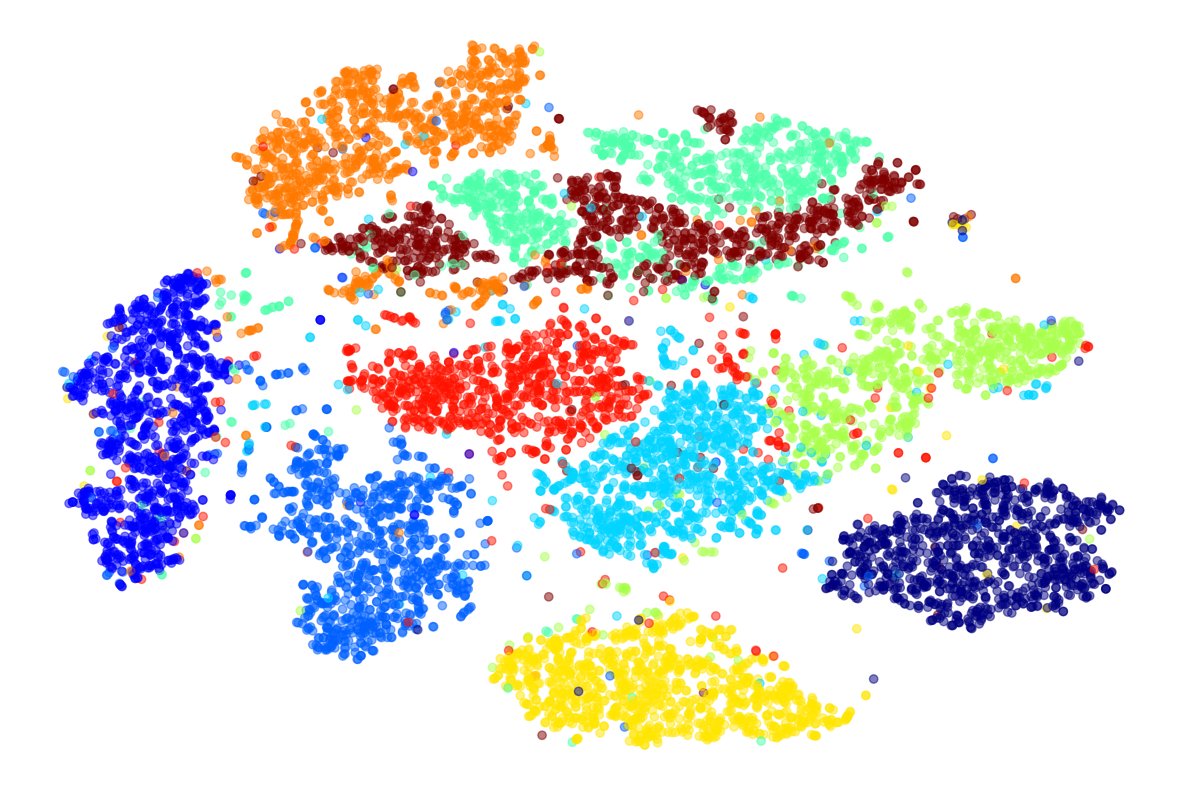

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(D_reduced[:,0],D_reduced[:,1],c=l_part.astype(np.int8),cmap="jet",alpha=0.5)
plt.axis("off")
plt.show()

In [159]:
import random
import matplotlib.patheffects as patheffects
def plt_fig(D_reduced, l_part):
    plt.figure(figsize=(15, 10))
    plt.scatter(D_reduced[:, 0], D_reduced[:, 1], c=l_part.astype(np.int8), cmap="jet", alpha=0.5)
    plt.axis("off")
    
    digits = np.unique(l_part)
    for digit in digits:
        indices = np.where(l_part == digit)[0]
        random_index = random.sample(list(indices), 10)
        D_random = D_reduced[random_index]

        for i in range(len(D_random)):
            plt.text(D_random[i, 0], D_random[i, 1], str(digit), fontsize=18, color='black',path_effects=[patheffects.withStroke(linewidth=3,foreground="white",capstyle="round")])

    plt.show()

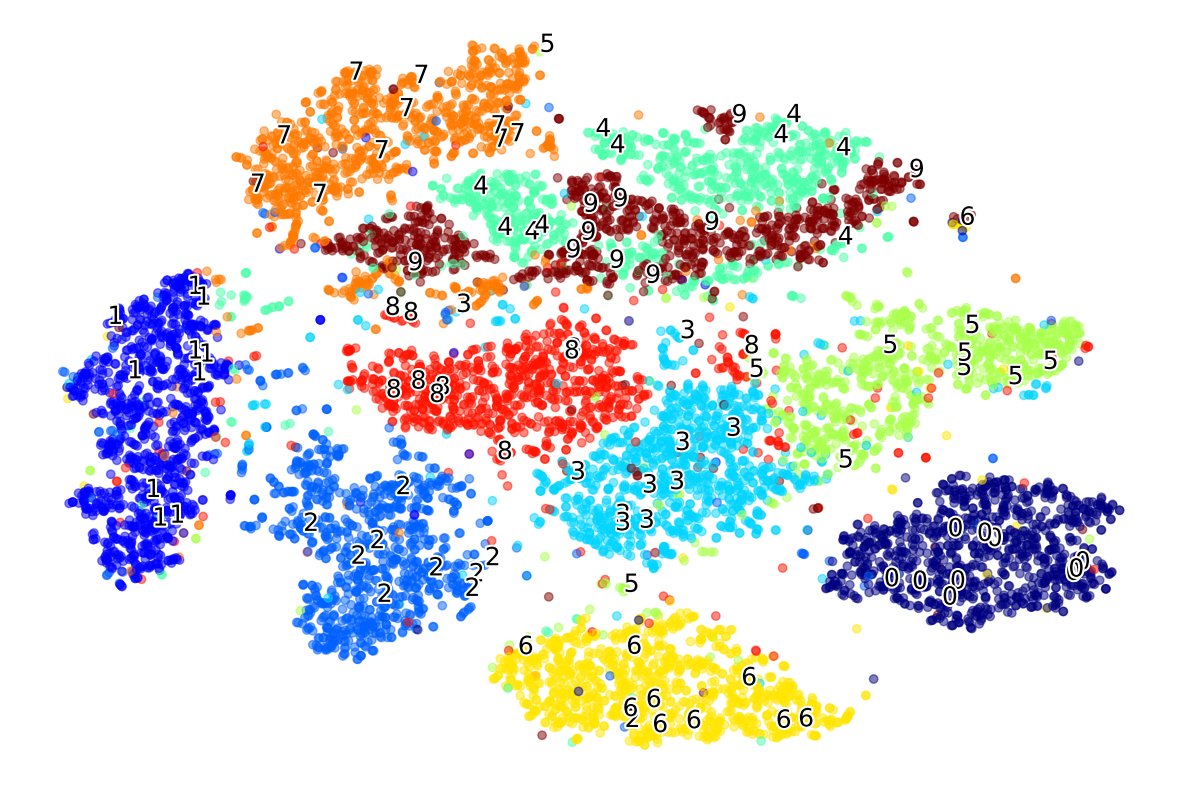

In [160]:
plt_fig(D_reduced,l_part)

0.8523564338684082


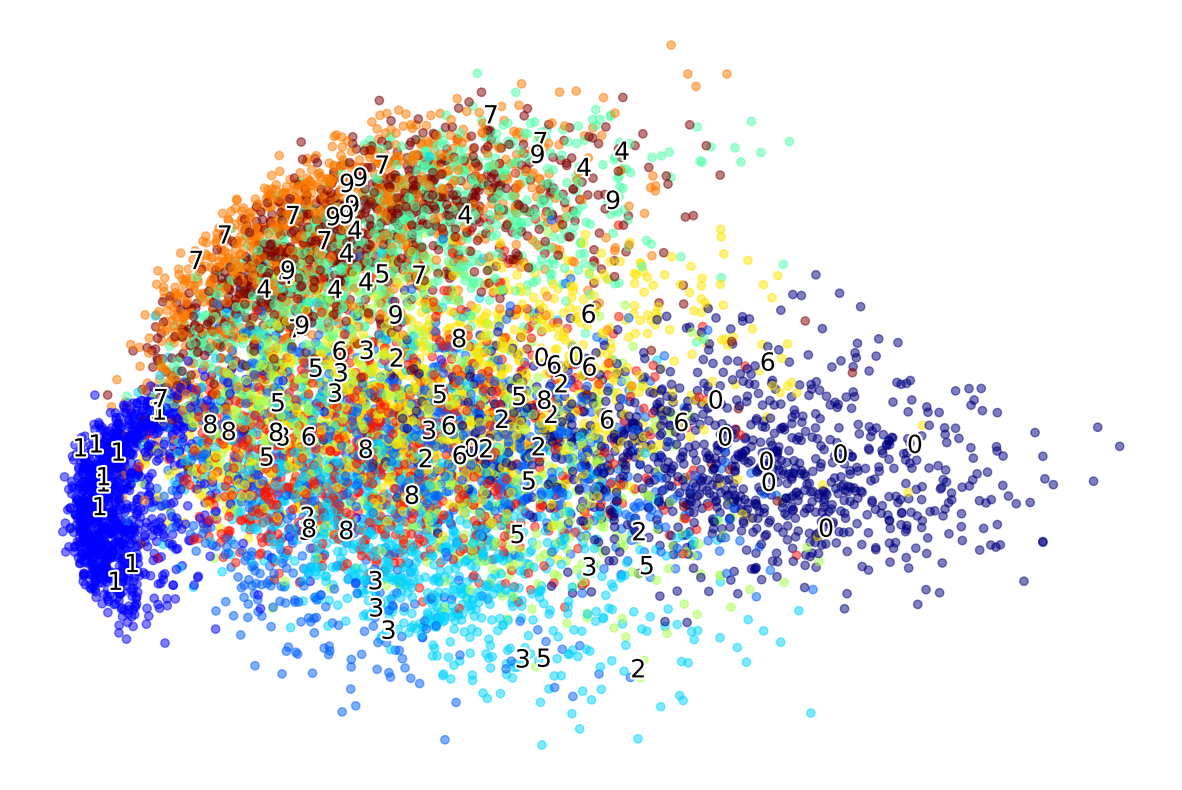

In [161]:
pca=PCA(n_components=2,random_state=42)
start=time.time()
D_pca_reduced=pca.fit_transform(D_part)
end=time.time()
time_diff=end-start
print(time_diff)
plt_fig(D_pca_reduced,l_part)

27.54462432861328


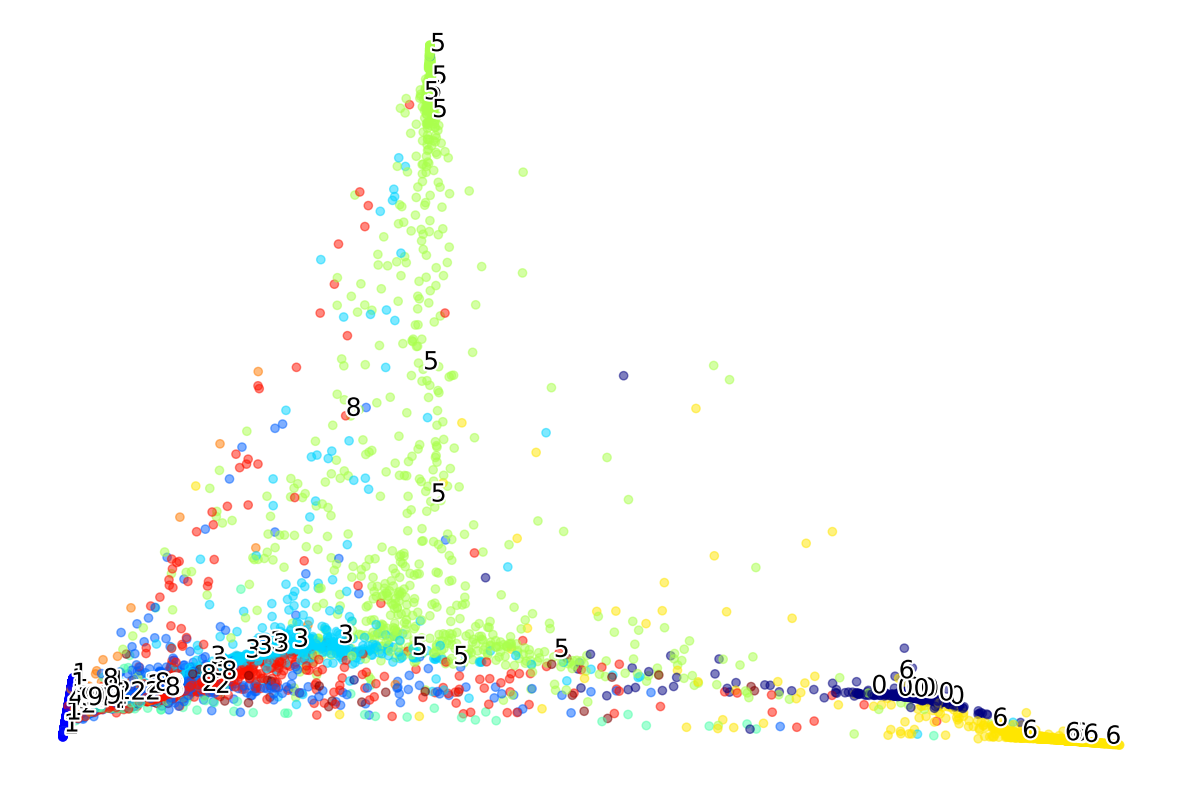

In [162]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
start=time.time()
D_lle_reduced = lle.fit_transform(D_part)
end=time.time()
time_diff=end-start
print(time_diff)
plt_fig(D_lle_reduced,l_part)

In [ ]:
from sklearn.manifold import MDS
start=time.time()
D_mds_reduced = MDS(n_components=2, normalized_stress=False, random_state=42).fit_transform(D_part)
end=time.time()
time_diff=end-start
print(time_diff)
plt_fig(D_mds_reduced,l_part)

In [53]:
#10
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(strat_split.split(faces.data,faces.target))
X_train_val = faces.data[train_val_idx]
y_train_val = faces.target[train_val_idx]
X_test = faces.data[test_idx]
y_test = faces.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=43)
train_idx, val_idx = next(strat_split.split(X_train_val, y_train_val))
X_train = X_train_val[train_idx]
y_train = y_train_val[train_idx]
X_val= X_train_val[val_idx]
y_val = y_train_val[val_idx]

In [57]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil_score=[]
k_d=[]
for i in range(200):
    k=i+2
    kmeans=KMeans(n_clusters=k,n_init='auto')
    y_pred=kmeans.fit_predict(X_train)
    score=silhouette_score(X_train,y_pred)
    k_d.append(k)
    sil_score.append(score)
print(sil_score)
print(k_d)

C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[0.17186199, 0.12281053, 0.10530708, 0.08918912, 0.111394495, 0.07898709, 0.08606925, 0.08728957, 0.0964258, 0.082751006, 0.06517118, 0.078506194, 0.07207753, 0.08757691, 0.08924229, 0.08541557, 0.10530208, 0.09858502, 0.10858877, 0.10945471, 0.10550353, 0.111041896, 0.11300374, 0.10272541, 0.12607795, 0.107046776, 0.124473825, 0.11824699, 0.12472666, 0.13724044, 0.11965064, 0.12747543, 0.1313482, 0.15135156, 0.13049462, 0.14348021, 0.1509435, 0.14452082, 0.13856699, 0.1545103, 0.14851958, 0.14990006, 0.14606081, 0.14839314, 0.15415755, 0.15023826, 0.15255027, 0.15039699, 0.16898468, 0.15704836, 0.15551797, 0.15293293, 0.17521216, 0.14129719, 0.1595961, 0.16868165, 0.16522802, 0.15509173, 0.18452677, 0.18278852, 0.16321191, 0.17872873, 0.17861381, 0.17418976, 0.1694714, 0.18815884, 0.18005295, 0.18090335, 0.17726214, 0.18108663, 0.17962907, 0.18190312, 0.18713583, 0.18550093, 0.18017904, 0.1876073, 0.20199569, 0.18662246, 0.18674701, 0.18813772, 0.19459467, 0.18923575, 0.1944608, 0.178

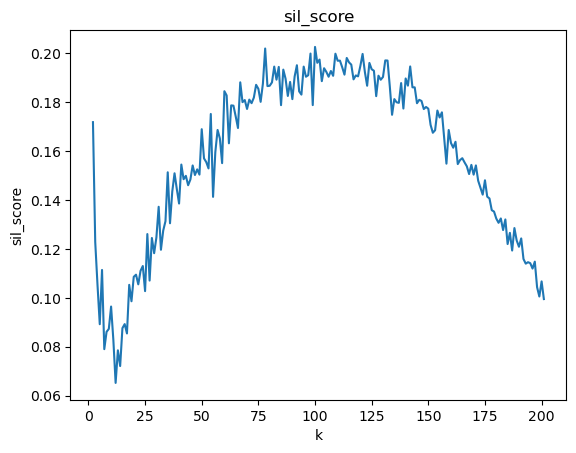

In [59]:
import matplotlib.pyplot as plt
plt.plot(k_d,sil_score)
plt.title("sil_score")
plt.xlabel("k")
plt.ylabel("sil_score")
plt.show()

In [60]:
k_best=k_d[sil_score.index(max(sil_score))]
print(k_best)

100


C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0


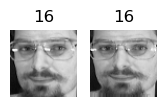

Cluster 1


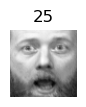

Cluster 2


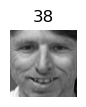

Cluster 3


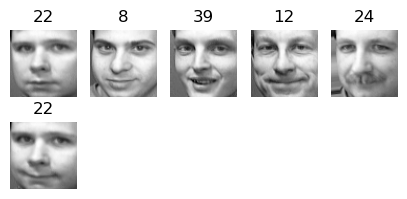

Cluster 4


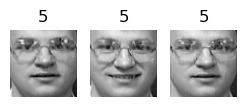

Cluster 5


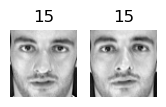

Cluster 6


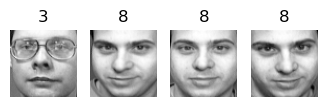

Cluster 7


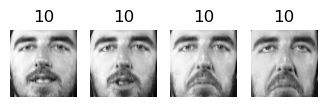

Cluster 8


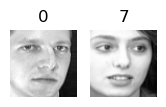

Cluster 9


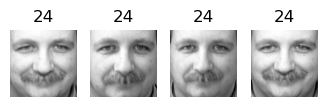

Cluster 10


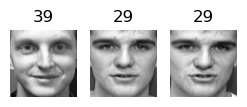

Cluster 11


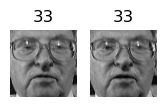

Cluster 12


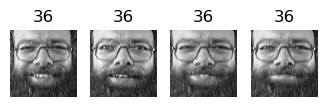

Cluster 13


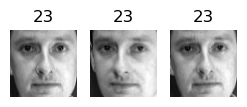

Cluster 14


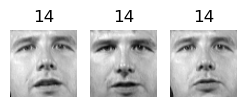

Cluster 15


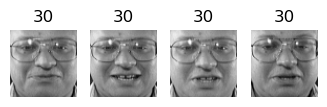

Cluster 16


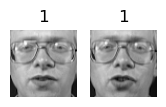

Cluster 17


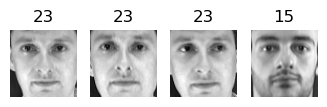

Cluster 18


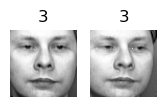

Cluster 19


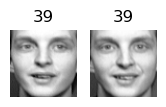

Cluster 20


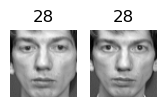

Cluster 21


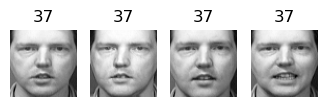

Cluster 22


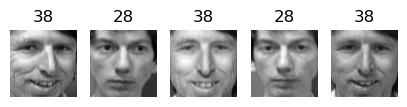

Cluster 23


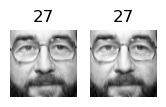

Cluster 24


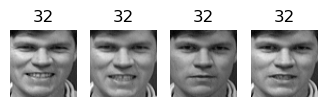

Cluster 25


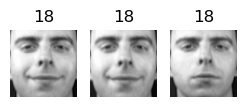

Cluster 26


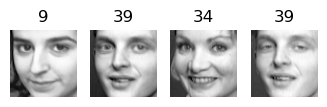

Cluster 27


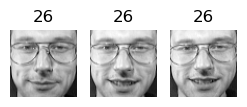

Cluster 28


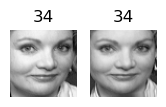

Cluster 29


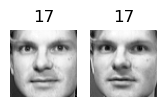

Cluster 30


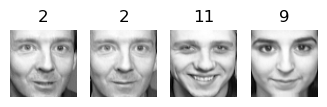

Cluster 31


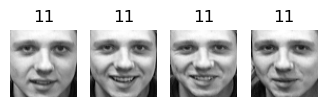

Cluster 32


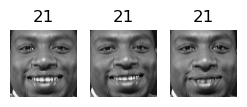

Cluster 33


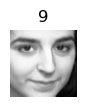

Cluster 34


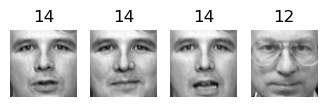

Cluster 35


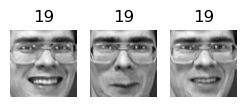

Cluster 36


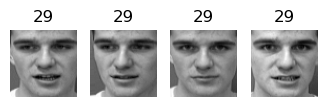

Cluster 37


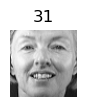

Cluster 38


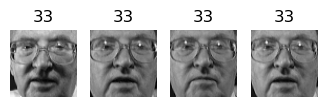

Cluster 39


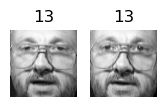

Cluster 40


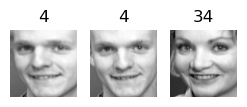

Cluster 41


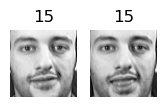

Cluster 42


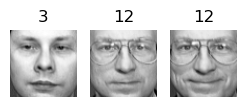

Cluster 43


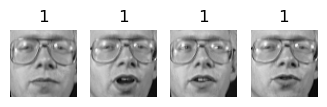

Cluster 44


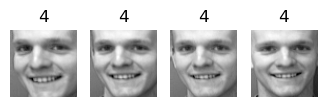

Cluster 45


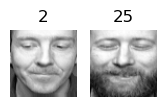

Cluster 46


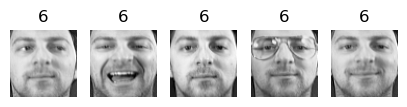

Cluster 47


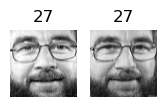

Cluster 48


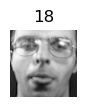

Cluster 49


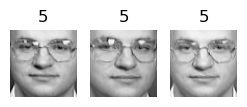

Cluster 50


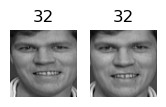

Cluster 51


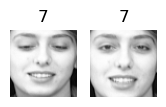

Cluster 52


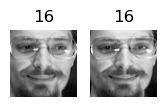

Cluster 53


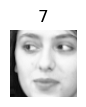

Cluster 54


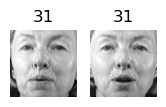

Cluster 55


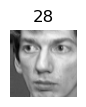

Cluster 56


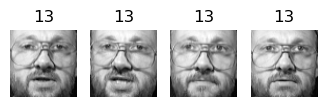

Cluster 57


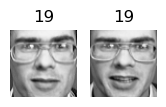

Cluster 58


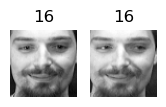

Cluster 59


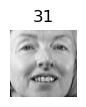

Cluster 60


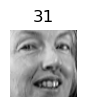

Cluster 61


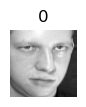

Cluster 62


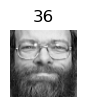

Cluster 63


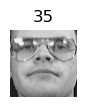

Cluster 64


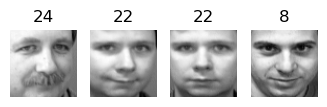

Cluster 65


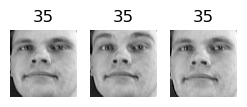

Cluster 66


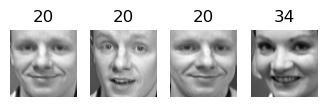

Cluster 67


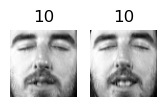

Cluster 68


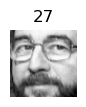

Cluster 69


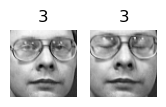

Cluster 70


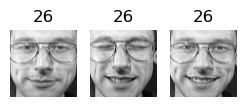

Cluster 71


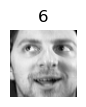

Cluster 72


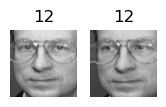

Cluster 73


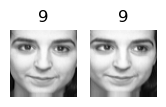

Cluster 74


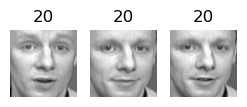

Cluster 75


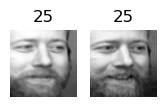

Cluster 76


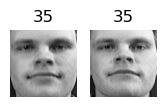

Cluster 77


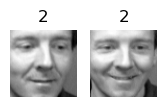

Cluster 78


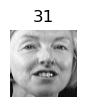

Cluster 79


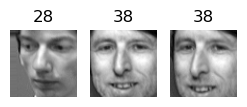

Cluster 80


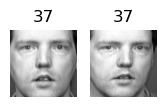

Cluster 81


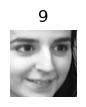

Cluster 82


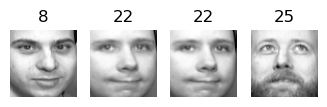

Cluster 83


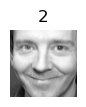

Cluster 84


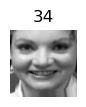

Cluster 85


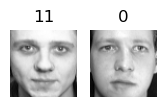

Cluster 86


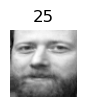

Cluster 87


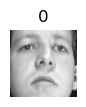

Cluster 88


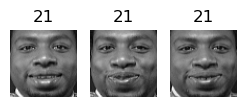

Cluster 89


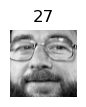

Cluster 90


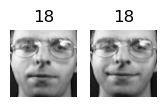

Cluster 91


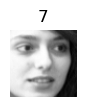

Cluster 92


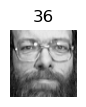

Cluster 93


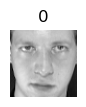

Cluster 94


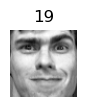

Cluster 95


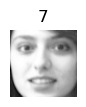

Cluster 96


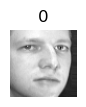

Cluster 97


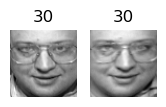

Cluster 98


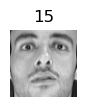

Cluster 99


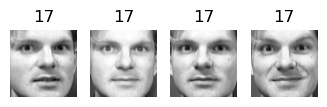

In [61]:
import numpy as np
KMeans_best=KMeans(n_clusters=k_best,n_init='auto')
best_pred=KMeans_best.fit_predict(X_train)
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
for cluster_id in np.unique(KMeans_best.labels_):
    print("Cluster", cluster_id)
    in_cluster = KMeans_best.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [62]:
#11
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_val, y_val)

0.9125

In [74]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

KMeans_best = KMeans(n_clusters=k_best, n_init='auto')
X_train_reduced = KMeans_best.fit_transform(X_train_pca)
X_test_reduced = KMeans_best.transform(X_test_pca)
X_val_reduced = KMeans_best.transform(X_val_pca)

rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_reduced, y_train)
rnd_clf.score(X_val_reduced, y_val)

C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.7625

In [79]:
def best_clusta(X_train_pca,X_val_pca,a,score,k_list):
    KMeans_best = KMeans(n_clusters=a, n_init='auto')
    X_train_reduced = KMeans_best.fit_transform(X_train_pca)
    X_val_reduced = KMeans_best.transform(X_val_pca)

    rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
    rnd_clf.fit(X_train_reduced, y_train)
    k_list.append(a)
    score.append(rnd_clf.score(X_val_reduced, y_val))

C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

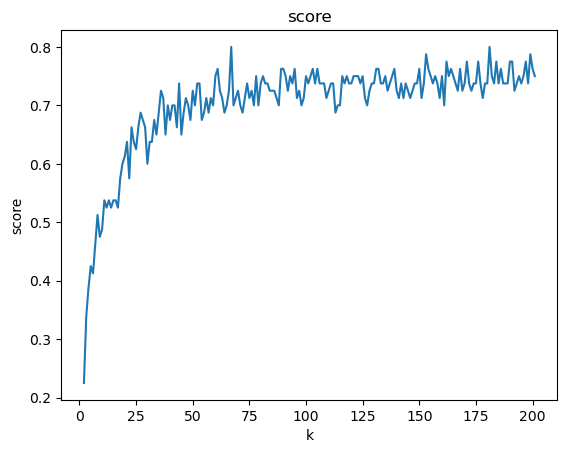

In [81]:
k_list=[]
score=[]
for i in range(200):
    best_clusta(X_train_pca,X_val_pca,i+2,score,k_list)
import matplotlib.pyplot as plt
plt.plot(k_list,score)
plt.title("score")
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [82]:
k_best=k_list[score.index(max(score))]
print(k_best)

67


In [85]:
import numpy as np
X_train_marge = np.c_[X_train_pca, X_train_reduced]
X_val_marge = np.c_[X_val_pca, X_val_reduced]
X_test_marge = np.c_[X_test_pca, X_test_reduced]

In [86]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_marge, y_train)
clf.score(X_val_marge, y_val)

0.8125

In [87]:
def best_clusta_c(X_train_pca,X_val_pca,a,score,k_list):
    KMeans_best = KMeans(n_clusters=a, n_init='auto')
    X_train_reduced = KMeans_best.fit_transform(X_train_pca)
    X_val_reduced = KMeans_best.transform(X_val_pca)
    X_train_marge = np.c_[X_train_pca, X_train_reduced]
    X_val_marge = np.c_[X_val_pca, X_val_reduced]
    rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
    rnd_clf.fit(X_train_reduced, y_train)
    k_list.append(a)
    score.append(rnd_clf.score(X_val_reduced, y_val))

C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

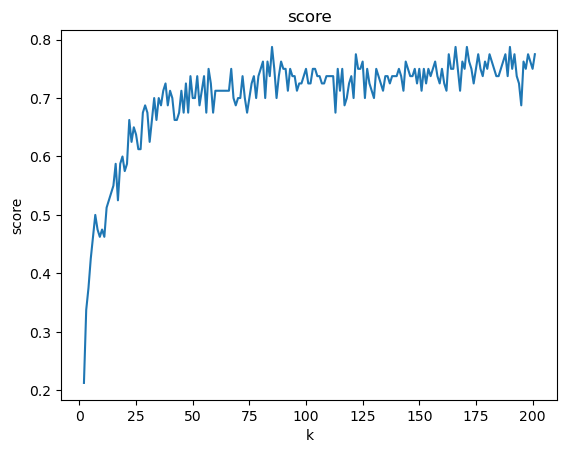

In [88]:
k_list_c=[]
score_c=[]
for i in range(200):
    best_clusta(X_train_pca,X_val_pca,i+2,score_c,k_list_c)
import matplotlib.pyplot as plt
plt.plot(k_list_c,score_c)
plt.title("score")
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [89]:
k_best_c=k_list_c[score.index(max(score_c))]
print(k_best_c)

153


In [132]:
#12
import os
os.environ["OMP_NUM_THREADS"] = "1"
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=40,n_init=10)
y_gm_pred=gm.fit_predict(X_train_pca)

C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\71sug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

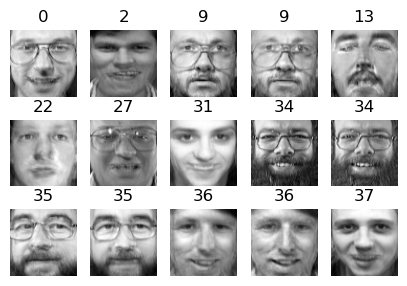

In [94]:
X_new_pca,y_new=gm.sample(n_samples=15)
X_new=pca.inverse_transform(X_new_pca)
plot_faces(X_new,y_new)

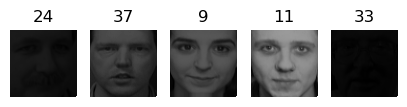

In [120]:
X_dark=X_train[:5].copy()
y_dark=y_train[:5]
X_dark[:,:-1] *= 0.05
plot_faces(X_dark,y_dark)

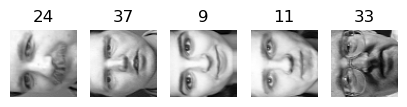

In [123]:
X_rot=X_train[:5].copy()
y_rot=y_train[:5]
X_rot=X_rot.reshape(-1,64,64)
X_rot=np.transpose(X_rot,axes=[0,2,1])
X_rot=X_rot.reshape(-1,64*64)
plot_faces(X_rot,y_rot)                 

In [124]:
gm.score_samples(X_train_pca[:5])

array([ 967.30707016,  997.17470779, 1011.0724597 ,  966.30977788,
       1005.44655715])

In [125]:
X_dark_pca=pca.transform(X_dark[:5])
gm.score_samples(X_dark_pca)

array([-1.99489920e+08, -2.01830908e+08, -2.00893143e+08, -2.01353597e+08,
       -2.07693915e+08])

In [126]:
X_rot_pca=pca.transform(X_rot[:5])
gm.score_samples(X_rot_pca)

array([-21597741.84352622, -28113985.58812879, -49642538.68163591,
       -59133451.67524894, -26427892.08808002])

In [129]:
#13
from sklearn.metrics import mean_squared_error
X_train_pca=pca.transform(X_train)
X_train_back=pca.inverse_transform(X_train_pca)
print(mean_squared_error(X_train,X_train_back))

0.00018832948


In [130]:
X_rot_pca=pca.transform(X_rot)
X_rot_back=pca.inverse_transform(X_rot_pca)
print(mean_squared_error(X_rot,X_rot_back))

0.008368548


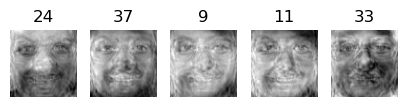

In [131]:
plot_faces(X_rot_back,y_rot)